In [77]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib.patches as mpatches
import pylab as pylab
from scipy import stats
from scipy.stats import sem


In [78]:
# Load data file
crime_data = 'Resources/Crime_data/fatal-police-shootings-data.csv'
#Read data file
crime_df = pd.read_csv(crime_data)
crime_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3229,Kameron Prescott,12/21/2017,shot,unarmed,6.0,M,W,Schertz,TX,False,other,Not fleeing,False
1,16,Autumn Steele,1/6/2015,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
2,1165,Ciara Meyer,1/11/2016,shot,unarmed,12.0,F,W,Penn Township,PA,False,other,Not fleeing,False
3,1883,Tyre King,9/14/2016,shot,toy weapon,13.0,M,B,Columbus,OH,False,other,Foot,False
4,27,Omarr Julian Maximillian Jackson,1/7/2015,shot,gun,37.0,M,B,New Orleans,LA,False,attack,Foot,True


In [79]:
#Collect year, age, armed, mental illness, gender, age, flee, body camera, states 
#Race had the most discrepancy --> 
crime_df_new = crime_df[['date', 'armed','threat_level', 'age', 'gender', 'race', 'city','state', 'signs_of_mental_illness', 'flee', 'body_camera']]
crime_df_new
crime_df_rename = crime_df_new.rename(columns = {'date': 'Date of Incident', 
                                                'armed': 'Weapon Used',
                                                'threat_level': 'Threat',
                                                'age': 'Age',
                                                'gender': 'Gender',
                                                'race':'Race',
                                                'city':'City', 
                                                'state': 'State',
                                                'signs_of_mental_illness': 'Mental Illness',
                                                'flee': 'Flee',
                                                'body_camera': 'Body Camera'})

#Assign Date of Incidient to a new variable 
crime_df_rename['Date of Incident']= pd.to_datetime(crime_df_rename['Date of Incident'])


#Filter incidents between 01-01-2015 to 12-31-2018 only 
mask = (crime_df_rename['Date of Incident'] > '2015-01-01') &(crime_df_rename['Date of Incident'] <='2018-12-31')


#Create new DF from the filtered dates 
clean_date = crime_df_rename.loc[mask]
clean_date.head()

,Date of Incident,Weapon Used,Threat,Age,Gender,Race,City,State,Mental Illness,Flee,Body Camera
0,2017-12-21,unarmed,other,6.0,M,W,Schertz,TX,False,Not fleeing,False
1,2015-01-06,unarmed,other,34.0,F,W,Burlington,IA,False,Not fleeing,True
2,2016-01-11,unarmed,other,12.0,F,W,Penn Township,PA,False,Not fleeing,False
3,2016-09-14,toy weapon,other,13.0,M,B,Columbus,OH,False,Foot,False
4,2015-01-07,gun,attack,37.0,M,B,New Orleans,LA,False,Foot,True


In [80]:
#Count number of rows to account of NaN values 
clean_date.count()

Date of Incident    3934
Weapon Used         3689
Threat              3934
Age                 3801
Gender              3931
Race                3656
City                3934
State               3934
Mental Illness      3934
Flee                3800
Body Camera         3934
dtype: int64

In [81]:
#Dropping rows with NaN values 
df = clean_date.dropna(how='any')
df.count()

Date of Incident    3272
Weapon Used         3272
Threat              3272
Age                 3272
Gender              3272
Race                3272
City                3272
State               3272
Mental Illness      3272
Flee                3272
Body Camera         3272
dtype: int64

In [82]:
 # Create bins for age groups 
bins = [5, 17, 30, 50, 70, 90]

# Create labels for these bins
group_labels = ["5-17", "18-30", "31-50", "51-70", "71-90"]
       
age = pd.cut(df["Age"], bins, labels=group_labels).head()

df["Age Range"] = pd.cut(df["Age"], bins, labels=group_labels)
df.head()

/Users/danielconde/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Date of Incident,Weapon Used,Threat,Age,Gender,Race,City,State,Mental Illness,Flee,Body Camera,Age Range
0,2017-12-21,unarmed,other,6.0,M,W,Schertz,TX,False,Not fleeing,False,5-17
1,2015-01-06,unarmed,other,34.0,F,W,Burlington,IA,False,Not fleeing,True,31-50
2,2016-01-11,unarmed,other,12.0,F,W,Penn Township,PA,False,Not fleeing,False,5-17
3,2016-09-14,toy weapon,other,13.0,M,B,Columbus,OH,False,Foot,False,5-17
4,2015-01-07,gun,attack,37.0,M,B,New Orleans,LA,False,Foot,True,31-50


In [83]:
#bin by year
cut_points = pd.to_datetime([np.datetime64('2015-01-01'), np.datetime64('2015-12-31'), np.datetime64('2016-12-31'), np.datetime64('2017-12-31'), np.datetime64('2018-12-31')])
group_names = ["2015", "2016", "2017", "2018"]
df["Year"] = pd.cut(df['Date of Incident'], cut_points, labels=group_names)
df.head()

/Users/danielconde/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Date of Incident,Weapon Used,Threat,Age,Gender,Race,City,State,Mental Illness,Flee,Body Camera,Age Range,Year
0,2017-12-21,unarmed,other,6.0,M,W,Schertz,TX,False,Not fleeing,False,5-17,2017
1,2015-01-06,unarmed,other,34.0,F,W,Burlington,IA,False,Not fleeing,True,31-50,2015
2,2016-01-11,unarmed,other,12.0,F,W,Penn Township,PA,False,Not fleeing,False,5-17,2016
3,2016-09-14,toy weapon,other,13.0,M,B,Columbus,OH,False,Foot,False,5-17,2016
4,2015-01-07,gun,attack,37.0,M,B,New Orleans,LA,False,Foot,True,31-50,2015


# Common Weapons (Dan)

## Weapons DataFrame

In [84]:
# DataFrame Column Method
weapons_list_df = df[["Year","Weapon Used"]]
weapons_list_df = weapons_list_df.groupby("Year")

count_list = weapons_list_df["Weapon Used"].value_counts().to_frame()
count_list = count_list.rename(columns={"Weapon Used": "count"})
count_list = count_list.reset_index()
count_list = count_list.groupby("Year").head()

# Creating sub dfs from main df and saving as keys in a dictionary
most_common_weapons = {}
year_list = ["2015","2016","2017","2018"]

for thing in year_list:
    most_common_weapons[thing] = count_list.loc[count_list["Year"]==thing]

## Bar Graph Subplot

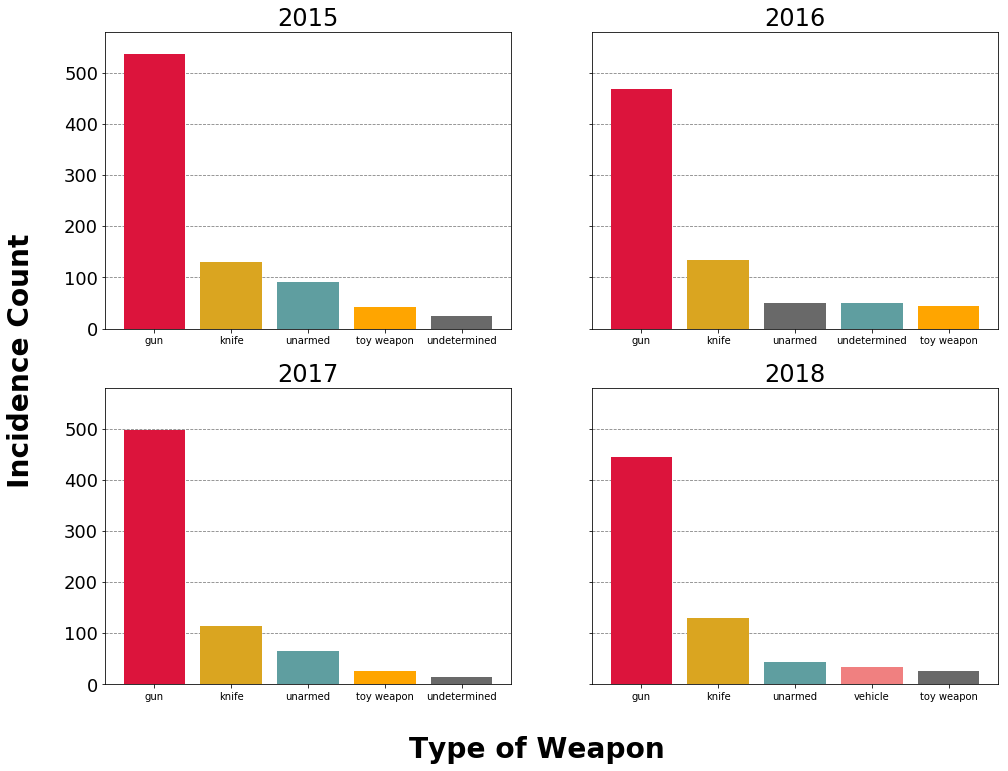

In [85]:
# The Subplot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12), sharey=True)
fig.text(0.5, 0.04, 'Type of Weapon', ha='center', fontsize=28, fontweight="bold")
fig.text(0.04, 0.5, 'Incidence Count', va='center', rotation='vertical', fontsize=28, fontweight="bold")

# plt.suptitle("Most Commonly Used Weapons in Cases of Fatal Police Shootings", fontsize=24, fontweight="bold")


# Each Axis


# 2015
x_axis_2015 = np.arange(len(most_common_weapons["2015"]["Weapon Used"]))
y_axis_2015 = most_common_weapons["2015"]["count"]

ax1.bar(x_axis_2015, y_axis_2015, color=['crimson', 'goldenrod', 'cadetblue', 'orange', 'dimgrey'])
ax1.set_ylim([0, 580])
ax1.title.set_text("2015")
ax1.title.set_size(24)

tick_locations_2015 = [value for value in x_axis_2015]
ax1.set_xticks(tick_locations_2015)
ax1.set_xticklabels(most_common_weapons["2015"]["Weapon Used"])

ax1.tick_params(axis='x', labelsize=10)
# ax1.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax1.tick_params(axis='y', labelsize=18)

ax1.set_axisbelow(True)
ax1.yaxis.grid(color='gray', linestyle='dashed')

# 2016
x_axis_2016 = np.arange(len(most_common_weapons["2016"]["Weapon Used"]))
y_axis_2016 = most_common_weapons["2016"]["count"]

ax2.bar(x_axis_2016, y_axis_2016, color=['crimson', 'goldenrod', 'dimgrey', 'cadetblue', 'orange'])
ax2.set_ylim([0, 580])
ax2.title.set_text("2016")
ax2.title.set_size(24)

tick_locations_2016 = [value for value in x_axis_2016]
ax2.set_xticks(tick_locations_2016)
ax2.set_xticklabels(most_common_weapons["2016"]["Weapon Used"])

ax2.tick_params(axis='x', labelsize=10)
# ax2.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax2.tick_params(axis='y', labelsize=18)

ax2.set_axisbelow(True)
ax2.yaxis.grid(color='gray', linestyle='dashed')


# 2017
x_axis_2017 = np.arange(len(most_common_weapons["2017"]["Weapon Used"]))
y_axis_2017 = most_common_weapons["2017"]["count"]

ax3.bar(x_axis_2017, y_axis_2017, color=['crimson', 'goldenrod', 'cadetblue', 'orange', 'dimgrey'])
ax3.set_ylim([0, 580])
ax3.title.set_text("2017")
ax3.title.set_size(24)

tick_locations_2017 = [value for value in x_axis_2017]
ax3.set_xticks(tick_locations_2017)
ax3.set_xticklabels(most_common_weapons["2017"]["Weapon Used"])

ax3.tick_params(axis='x', labelsize=10)
# ax3.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax3.tick_params(axis='y', labelsize=18)

ax3.set_axisbelow(True)
ax3.yaxis.grid(color='gray', linestyle='dashed')


# 2018
x_axis_2018 = np.arange(len(most_common_weapons["2018"]["Weapon Used"]))
y_axis_2018 = most_common_weapons["2018"]["count"]

ax4.bar(x_axis_2018, y_axis_2018, color=['crimson', 'goldenrod', 'cadetblue', 'lightcoral', 'dimgrey'])
ax4.set_ylim([0, 580])
ax4.title.set_text("2018")
ax4.title.set_size(24)

tick_locations_2018 = [value for value in x_axis_2018]
ax4.set_xticks(tick_locations_2018)
ax4.set_xticklabels(most_common_weapons["2018"]["Weapon Used"])

ax4.tick_params(axis='x', labelsize=10)
# ax4.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
ax4.tick_params(axis='y', labelsize=18)

ax4.set_axisbelow(True)
ax4.yaxis.grid(color='gray', linestyle='dashed')

# Saving Figure
plt.savefig("Output/common_weapons.jpg")

# Police Fatality (Michelle's Part)

Total Fatalities    818.0
dtype: float64
Total Fatalities    26.792412
dtype: float64


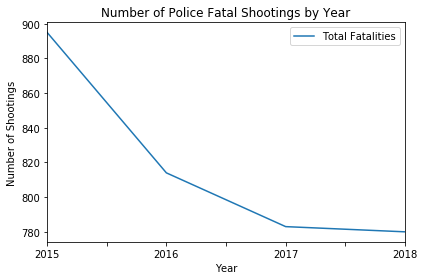

,Fatalities
index,
2015,239
2016,219
2017,208
2018,172


In [86]:
#group by year
year_group = df.groupby("Year")
year_count = year_group["Year"].count().to_frame()
year_count = year_count.rename(columns={"Year": "Total Fatalities"})

year_count_mean=year_count.mean()
year_count_sem =year_count.sem()
print(year_count_mean)
print(year_count_sem)

#number of fatalities in each year
count_chart = year_count.plot(title="Number of Police Fatal Shootings by Year")
count_chart.set_ylabel("Number of Shootings")
plt.tight_layout()
plt.show()

mental_health_total = df.loc[(df['Mental Illness'] == True )]
mental_health_total_count = mental_health_total["Year"].value_counts().to_frame()
mental_health_total_count = mental_health_total_count.reset_index()
mental_health_total_count = mental_health_total_count.set_index("index")
mental_health_total_count = mental_health_total_count.sort_index(ascending=True)
mental_health_total_count = mental_health_total_count.rename(columns={"Year": "Fatalities"})
mental_health_total_count

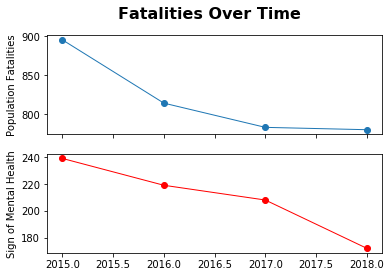

Not Flee Fatalities    569.0
dtype: float64
Not Flee Fatalities    32.682819
dtype: float64


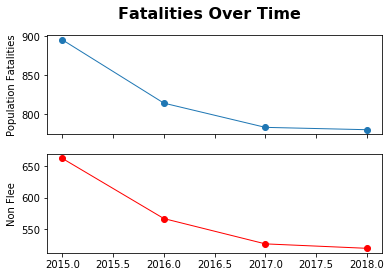

In [87]:
year=[2015, 2016, 2017, 2018]

fig, (mh_ax1, mh_ax2) = plt.subplots(2,1, sharex=True)
fig.suptitle("Fatalities Over Time", fontsize=16, fontweight="bold")

mh_ax1.plot(year, year_count, linewidth=1, marker="o")
mh_ax1.set_ylabel("Population Fatalities")

mh_ax2.plot(year, mental_health_total_count, linewidth=1, marker="o", color="r")
mh_ax2.set_ylabel("Sign of Mental Health")

plt.savefig("Output/Sign_Mental_Health.png")
plt.show()

# t-test of mentally health population to all fatalities
stats.ttest_1samp(mental_health_total_count, year_count_mean)
#p-value <0.5, therefore the population of civilians showing signs of mental health to the population of the fatalities

#Total Civilians who did not flee but got shot
not_flee_total = df.loc[(df['Flee'] == 'Not fleeing' )]
not_flee_total_count = not_flee_total["Year"].value_counts().to_frame()
not_flee_total_count = not_flee_total_count.reset_index()
not_flee_total_count = not_flee_total_count.set_index("index")
not_flee_total_count = not_flee_total_count.sort_index(ascending=True)
not_flee_total_count = not_flee_total_count.rename(columns={"Year": "Not Flee Fatalities"})
not_flee_total_count
# list(not_flee_total_count)

not_flee_mean = not_flee_total_count.mean()
print(not_flee_mean)
not_flee_sem = not_flee_total_count.sem()
print(not_flee_sem)

year=[2015, 2016, 2017, 2018]

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.suptitle("Fatalities Over Time", fontsize=16, fontweight="bold")

ax1.plot(year, year_count, linewidth=1, marker="o")
ax1.set_ylabel("Population Fatalities")

ax2.plot(year, not_flee_total_count, linewidth=1, marker="o", color="r")
ax2.set_ylabel("Non Flee")

plt.savefig("Output/Non_Flee.png")
plt.show()

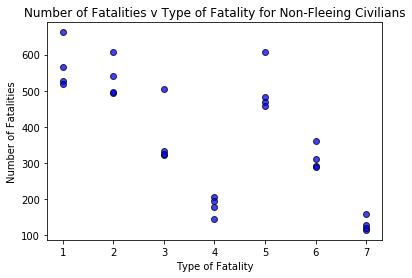

In [88]:
# t-test of non-flee population to all fatalities
stats.ttest_1samp(not_flee_total_count, year_count_mean)

#Total Civilians who did not flee, and are armed
not_flee_armed = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Weapon Used"] !='unarmed')]
not_flee_armed_count = not_flee_armed["Year"].value_counts().to_frame()
not_flee_armed_count = not_flee_armed_count.rename(columns={"Year": "Armed Fatalities"})
not_flee_armed_count = not_flee_armed_count.reset_index()
not_flee_armed_count = not_flee_armed_count.set_index("index")
not_flee_armed_count = not_flee_armed_count.sort_index(ascending=True)

#Total Civilians who did not flee, and threaten with attack
not_flee_attack = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Threat"] == "attack")]
not_flee_attack_count = not_flee_attack["Year"].value_counts().to_frame()
not_flee_attack_count = not_flee_attack_count.reset_index()
not_flee_attack_count = not_flee_attack_count.set_index("index")
not_flee_attack_count = not_flee_attack_count.sort_index(ascending = True)
not_flee_attack_count = not_flee_attack_count.rename(columns={"Year": "Attacked Fatalities"})

#Total Civilians who did not flee, and show signs of mental illness
not_flee_mh = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Mental Illness"] == True)]
not_flee_mh_count = not_flee_mh["Year"].value_counts().to_frame()

not_flee_mh_count = not_flee_mh_count.reset_index()
not_flee_mh_count = not_flee_mh_count.set_index("index")
not_flee_mh_count = not_flee_mh_count.sort_index(ascending = True)
not_flee_mh_count = not_flee_mh_count.rename(columns={"Year": "Mental Health Fatalities"})

#Total Civilians who did not flee, and not wearing a body camera
not_flee_bc = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Body Camera"] == False)]
not_flee_bc_count = not_flee_bc["Year"].value_counts().to_frame()

not_flee_bc_count = not_flee_bc_count.reset_index()
not_flee_bc_count = not_flee_bc_count.set_index("index")
not_flee_bc_count = not_flee_bc_count.sort_index(ascending = True)
not_flee_bc_count = not_flee_bc_count.rename(columns={"Year": "No Body Camera Fatalities"})

#Total Civilians who did not flee, and race=W
not_flee_w = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Race"] == "W")]
not_flee_w_count = not_flee_w["Year"].value_counts().to_frame()

not_flee_w_count = not_flee_w_count.reset_index()
not_flee_w_count = not_flee_w_count.set_index("index")
not_flee_w_count = not_flee_w_count.sort_index(ascending = True)
not_flee_w_count = not_flee_w_count.rename(columns={"Year": "Race (W) Fatalities"})

#Total Civilians who did not flee, and race=B
not_flee_b = df.loc[(df['Flee'] == 'Not fleeing' ) & (df["Race"] == "B")]
not_flee_b_count = not_flee_b["Year"].value_counts().to_frame()

not_flee_b_count = not_flee_b_count.reset_index()
not_flee_b_count = not_flee_b_count.set_index("index")
not_flee_b_count = not_flee_b_count.sort_index(ascending = True)
not_flee_b_count = not_flee_b_count.rename(columns={"Year": "Race (B) Fatalities"})

# Create a DataFrame of not fleeing data 
not_flee_df = pd.concat([not_flee_total_count, not_flee_armed_count,not_flee_attack_count, not_flee_mh_count, not_flee_bc_count, not_flee_w_count, not_flee_b_count], axis=1)

not_flee_df = not_flee_df.reset_index()

melted_df = not_flee_df.melt(id_vars=["index"], var_name = "Type", value_name = "Fatality Count")

# create numeric representations for each type 
# (Total Did not Flee = 1, Armed = 2, Attacked = 3, Mental Health = 4, No Body Cam = 5, Race (W) = 6, Race (B) = 7)
melted_df["Type Encoding"] = pd.factorize(melted_df['Type'])[0] + 1
melted_df.head()

# scatter using “Type Encoding” for x and “Fatality Count” for y

plt.scatter(melted_df["Type Encoding"], melted_df["Fatality Count"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Number of Fatalities v Type of Fatality for Non-Fleeing Civilians")
plt.xlabel("Type of Fatality")
plt.ylabel("Number of Fatalities")

plt.savefig("Output/Non_Flee_Scatter.png")
plt.show()


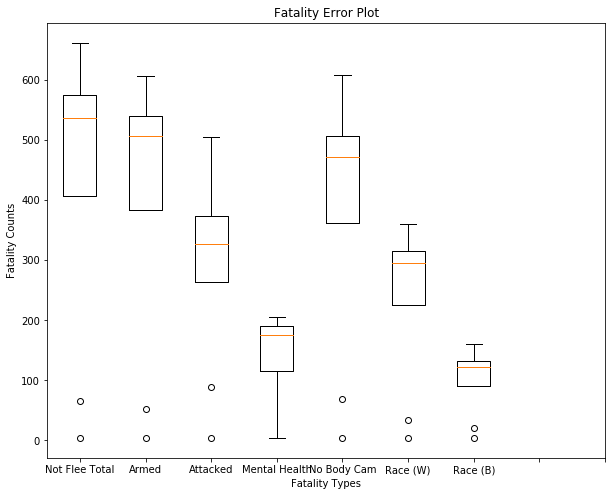

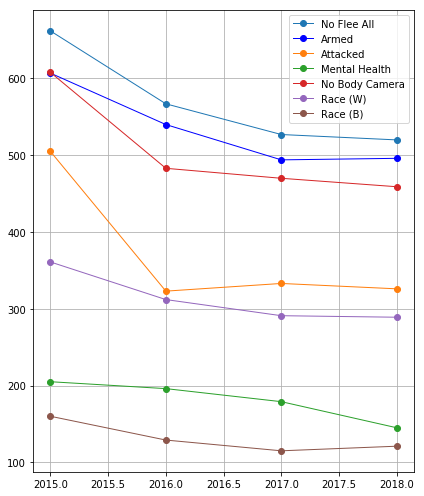

In [89]:
not_flee_describe =not_flee_df.describe()
not_flee_describe = not_flee_describe.rename(columns={"Total Fatalities":"Total", 
                                    "Not Flee Fatalities":"Not Flee Total", 
                                    "Armed Fatalities":"Armed", 
                                    "Attacked Fatalities": "Attacked", 
                                    "Mental Health Fatalities": "Mental Health",
                                    "No Body Camera Fatalities": "No Body Cam", 
                                    "Race (W) Fatalities":"Race (W)",
                                    "Race (B) Fatalities":"Race (B)"})

not_flee_describe.head()

means = not_flee_describe.loc[["mean"], ["Total", "Not Flee Total", "Armed", "Attacked", "Mental Health", "No Body Cam", "Race (W)", "Race (B)"]]

means.head()

not_flee_sem = not_flee_df.sem().to_frame()
not_flee_sem_list = not_flee_sem.loc[:, [0]]

not_flee_sem_list.head()

pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plot_array = not_flee_describe.iloc[:,0:10].values
plt.boxplot(plot_array)
plt.xticks(range(1,10), not_flee_describe.columns[0:10])

pylab.xlabel('Fatality Types')
pylab.ylabel('Fatality Counts')
pylab.title('Fatality Error Plot')

year=[2015, 2016, 2017, 2018]
plt.figure(figsize=(6,7))
no_flee = plt.plot(year, not_flee_total_count, linewidth=1, marker="o", label="No Flee All" )
no_flee_armed = plt.plot(year, not_flee_armed_count, linewidth=1, marker="o", color="b", label="Armed")
no_flee_attack = plt.plot(year, not_flee_attack_count, linewidth=1, marker="o", label = "Attacked")
no_flee_mh = plt.plot(year, not_flee_mh_count, linewidth=1, marker="o", label="Mental Health")
no_flee_bc = plt.plot(year, not_flee_bc_count, linewidth=1, marker="o", label="No Body Camera")
no_flee_w = plt.plot(year, not_flee_w_count, linewidth=1, marker="o", label="Race (W)")
no_flee_b = plt.plot(year, not_flee_b_count, linewidth=1, marker="o", label="Race (B)")

# Create a legend for our chart

plt.legend(loc="best")
plt.tight_layout()
plt.grid()
# Show the chart
plt.show()


# (Alex's Part)